$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# Dictionaries and Graph Theory

Authors  
Franco Saliola, Mélodie Lapointe

## Dictionaries

A *dictionary* is another builtin datatype. Unlike lists or tuples,
which are indexed by a range of numbers, dictionaries are indexed by
*keys*, which can be any immutable type. Strings and numbers can always
be keys. Dictionaries are sometimes called "associative arrays" in other
programming languages.

There are several ways to define dictionaries. Below are equivalent ways
to define a dictionary that pairs 'key1' with 'value1' and 'key2' with
'value2'.

In [ ]:
d = {'key1':'value1', 'key2':'value2'}
d

{'key1': 'value1', 'key2': 'value2'}

In [ ]:
d = dict(key1='value1', key2='value2')
d

{'key1': 'value1', 'key2': 'value2'}

In [ ]:
d = dict([('key1','value1'), ('key2','value2')])
d

{'key1': 'value1', 'key2': 'value2'}

In [ ]:
d = {1:[2,2], 'a':(6,5), 0:{1:2}}
d

{0: {1: 2}, 1: [2, 2], 'a': (6, 5)}

Dictionaries behave as lists, tuples, and strings for several important
operations.

|                    |                      |                             |
|--------------------|----------------------|-----------------------------|
| **Operation**      | **Syntax for lists** | **Syntax for dictionaries** |
| Accessing elements | `L[3]`               | `D[3]`                      |
| Length             | `len(L)`             | `len(D)`                    |
| Modifying          | `L[3] = 17`          | `D[3] = 17`                 |
| Deleting items     | `del L[3]`           | `del D[3]`                  |

**Exercise:** In the directed graph below, the vertex 1 points to the
vertices in the list \[2, 3\].

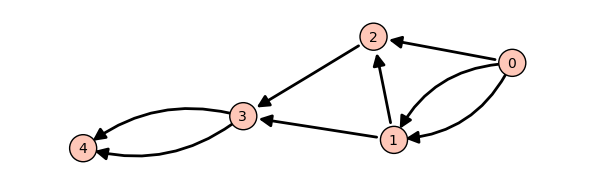

Create a dictionary with keys the vertices of the above directed graph,
and with values the lists of vertices pointed to by the vertex.

In [ ]:
E = {0:[1,1,2],1:[2,3],2:[3],3:[4,4]};E

{0: [1, 1, 2], 1: [2, 3], 2: [3], 3: [4, 4]}

**Exercise:** Use the **DiGraph** command to contruct the above directed
graph, and plot the directed graph ( *Hint* : In the documentation for
**DiGraph**, take a look at the ' *dictionary of lists* ' example.)

In [ ]:
G = DiGraph(E)
G.show()

**Exercise:** Find the *adjacency matrix* of the graph you constructed
above.

In [ ]:
G.adjacency_matrix()

[0 2 1 0 0]
[0 0 1 1 0]
[0 0 0 1 0]
[0 0 0 0 2]
[0 0 0 0 0]

**Exercise:** Compute the square of the adjacency matrix. Give a
graph-theoretic intepretation of the numbers in this matrix. Does your
intepretation hold for the cube of the adjacency matrix?

In [ ]:
(G.adjacency_matrix())^2

[0 0 2 3 0]
[0 0 0 1 2]
[0 0 0 0 2] 
[0 0 0 0 0]
[0 0 0 0 0]

## The Seven Bridges of Königsberg

**Exercise:** The *Seven Bridges of Königsberg* is the following famous
historical problem solved by Leonhard Euler in 1735. This is the problem
that started graph theory.

> The city of Königsberg in Prussia (now Kaliningrad, Russia) was set on
> both sides of the Pregel River, and included two large islands which
> were connected to each other and the mainland by seven bridges. The
> problem was to find a walk through the city that would cross each
> bridge once and only once. The islands could not be reached by any
> route other than the bridges, and every bridge must have been crossed
> completely every time (one could not walk halfway onto the bridge and
> then turn around to come at it from another side).
>
> 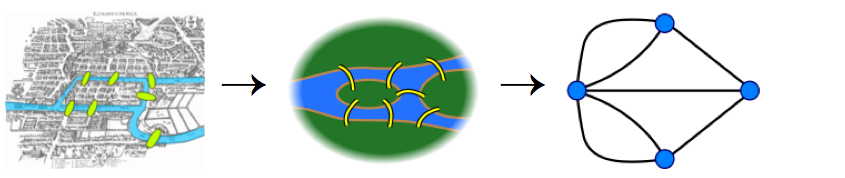

1.  Enter the graph on the right into Sage (use the `Graph` command, not
    the `DiGraph` command).

In [ ]:
D = {1:[2,2,3,4,4],2:[1,1,3],3:[1,2,4],4:[1,1,3]}
G = Graph(D)
G.show()

1.  Solve the problem; that is, does such a walk exist? (*Hint:* Take a
    look at the documentation for the **eulerian\_circuit** method; look
    up *Eulerian circuit* in Wikipedia if you don't know its
    definition.)

In [ ]:
G.eulerian_circuit()

False

*(The quotation and the image are from the Wikipedia page \`Seven
Bridges of Königsberg
\<http://en.wikipedia.org/wiki/Seven\_Bridges\_of\_K%C3%B6nigsberg\>\`\_
; the problem is from* *\`William Stein's
\<http://modular.math.washington.edu/\>\`\_* *Graph Theory Worksheet for
\`Math 480b \[2009 \<http://wiki.wstein.org/09/480b\>\`\_ \])*

## The Coxeter Graph

The *Coxeter graph* is the graph with 28 vertices $v_{i,j}$, for
$0 \leq i \leq
3$ and $0 \leq j \leq 6$, and with edges described by the rules:

1.  $v_{0,i}$ is connected to $v_{1,i}$, $v_{2,i}$, $v_{3,i}$ for all
    $0\leq i \leq 6$;
2.  $v_{1,j}$ is connected to $v_{1, j+1 (mod\, 7)}$ for all
    $0\leq j \leq 6$;
3.  $v_{2,j}$ is connected to $v_{2, j+2 (mod\, 7)}$ for all
    $0\leq j \leq 6$;
4.  $v_{3,j}$ is connected to $v_{3, j+3 (mod\, 7)}$ for all
    $0\leq j \leq 6$.

**Exercise:** Construct a dictionary **V** such that **V\[(i,j)\]** is
the list of vertices **(r,s)** that are connected to **(i,j)**. Use this
dictionary to construct and plot the *Coxeter graph* . ( *Hints:* Note
that writing **V\[i,j\]** is shorthand for writing **V\[(i,j)\]**. You
should be able to generate the lists of vertices by using loops and list
comprehensions.)

In [ ]:
V = {(0,j):[(i,j) for i in [1,2,3]] for j in range(7)}
V.update({(i,j):[(i,(j+i)%7)] for i in [1,2,3] for j in range(7)})
V

{(0, 0): [(1, 0), (2, 0), (3, 0)],
(0, 1): [(1, 1), (2, 1), (3, 1)],
(0, 2): [(1, 2), (2, 2), (3, 2)],
(0, 3): [(1, 3), (2, 3), (3, 3)],
(0, 4): [(1, 4), (2, 4), (3, 4)],
(0, 5): [(1, 5), (2, 5), (3, 5)],
(0, 6): [(1, 6), (2, 6), (3, 6)],
(1, 0): [(1, 1)],
(1, 1): [(1, 2)],
(1, 2): [(1, 3)],
(1, 3): [(1, 4)],
(1, 4): [(1, 5)],
(1, 5): [(1, 6)],
(1, 6): [(1, 0)],
(2, 0): [(2, 2)],
(2, 1): [(2, 3)],
(2, 2): [(2, 4)],
(2, 3): [(2, 5)],
(2, 4): [(2, 6)],
(2, 5): [(2, 0)],
(2, 6): [(2, 1)],
(3, 0): [(3, 3)],
(3, 1): [(3, 4)],
(3, 2): [(3, 5)],
(3, 3): [(3, 6)],
(3, 4): [(3, 0)],
(3, 5): [(3, 1)],
(3, 6): [(3, 2)]}

## Spectrum of a graph

The *spectrum* of a graph is the set of eigenvalues of the adjacency
matrix of the graph. The *spectrum* of the Coxeter graph is

-   $-1-\sqrt{6}$ with multiplicity 6,
-   $-1$ with multiplicity 7,
-   $\sqrt{2}-1$ with multiplicity 6,
-   $2$ with multiplicity 8,
-   $3$ with multiplicity 1.

It turns out that no other graph has this same spectrum (in this case,
we say that the graph *is determined by its spectrum*).

**Exercise:** Test to see that you correctly constructed the Coxeter
graph in the previous exercise. That is, compute the **adjacency
matrix** of the Coxeter graph, find the **eigenvalues** of the adjacency
matrix, and then compare them with the above.

In [ ]:
G = Graph(V)
sorted(G.adjacency_matrix().eigenvalues())

[-2.414213562373095?,
-2.414213562373095?,
-2.414213562373095?,
-2.414213562373095?,
-2.414213562373095?,
-2.414213562373095?,
-1,
-1,
-1,
-1,
-1,
-1,
-1,
0.4142135623730951?,
0.4142135623730951?,
0.4142135623730951?,
0.4142135623730951?,
0.4142135623730951?,
0.4142135623730951?,
2,
2,
2,
2,
2,
2,
2,
2,
3]

**Exercise:** The command **graphs(n)** generates all the graphs on $n$
vertices (up to isomorphism). Use this command to test whether there are
two graphs with less than 7 vertices that have the same spectrum.

In [ ]:
spectrum = set({})
compteur = 0
for i in range(1,4):
    for g in graphs(i):
        compteur += 1
        e = frozenset(g.adjacency_matrix().eigenvalues())
        if spectrum.isdisjoint(set({e})):
            spectrum.add(e)
        else:
            print('Two graphs have the same spectrum: ', e)
            break

Two graphs have the same spectrum:  frozenset({0})
Two graphs have the same spectrum:  frozenset({0})

## Birthday Paradox

In the following exercises, we will use Sage to estimate the probability
that in a group of $n$ people, two of them will have the same birthday.

**Exercise:** Using the command `graphs.RandomGNP`, create a function
that returns a graph with $n$ vertices and where the probability that
any two of the vertices is connected is 1/365.

In [ ]:
n = 23
G = graphs.RandomGNP(n,1/365)

**Exercise:** Plot a graph **g** created by your function above using
the **g.plot(layout='circular')**.

In [ ]:
G.plot(layout='circular')

Graphics object consisting of 26 graphics primitives

**Exercise:** Create 100 random graphs (using your above function) with
$n=23$ vertices. What ratio of them contains an edge? ( *Hint:* For a
graph **g**, the command **g.num\_edges()** returns the number of edges
in **g**.)

In [ ]:
compteur = 0
for i in range(100):
    G = graphs.RandomGNP(23,1/365)
    if G.num_edges() > 0:
        compteur += 1
compteur

53

**Exercise:** Repeat the above exercise with $n=57$ vertices.

In [ ]:
compteur = 0
for i in range(100):
    G = graphs.RandomGNP(57,1/365)
    if G.num_edges() > 0:
        compteur += 1
compteur

100

**Exercise:** Repeat the above exercises for all the values
$1, 2, ..., 120$. Plot the results using a line graph.

In [ ]:
ratio = []
for n in range(1,121):
    compteur = 0
    for i in range(100):
        G = graphs.RandomGNP(n,1/365)
        if G.num_edges() > 0:
            compteur += 1
    ratio.append(compteur)
l = [(i+1,ratio[i]) for i in range(120)]
line(l)

Graphics object consisting of 1 graphics primitive